# Analiza e Pagave në Shqipëri
### **Shkurtimisht**
*Ky studim ka për qëllim analizën e pagave në Shqipëri duke marrë për bazë të dhënat e marra nga viti 2021, më saktësisht prill 2021. Krijimi i një ideje sipërfaqësore për pagat në vend, krahasimi mes qarqeve, ku ndodhet forca më e madhe punëtore në vend, apo edhe devijimi i pagave të individëve nga paga mesatare (bruto). Nxjerrja e një konkluzioni se cilat janë punët më të paguara apo cila punë ka më shumë kërkesë për punëtor. Studimi do të vizualizohet me grafikë dhe tabela, si dhe do të shpjegohet me shifra për të dhënë një imazh të pastër, të thjeshtë dhe të saktë.*

**Burimi i të dhënave**: Drejtoria e Përgjithshme e Tatimeve (DPT) 
###
**Formati i të dhënave**: CSV, me mbi 690,000 rrjeshta (individ)
###
**Viti i analizuar**: prill 2021 


### Pjesa 1: Përshkrimi dhe përgatitja e të dhënave

- Paraqitja e të dhënave në tabel
- Analizë e të dhënave në tërësi
- Vizualizim i të dhënave me grafik


Tabela përmban gjithsej mbi 690 mijë rreshta dhe 10 variabla (kolona), të cilat janë:

1. NP: numri personal, i cili nuk do të shfaqet në tabel për shkak se është një e dhënë sensitive;
2. Emri, Mbiemri dhe Emri i plotë
3. NIPT: numri i personalizuar i bizneseve ku punojnë individet, nuk do të shfaqen në tabel
4. DRT: Drejtoria Rajonale e Tatimeve
5. P_Bruto: paga bruto për çdo individ
6. Profesioni: lloji i profesionit që ushtron çdo individ në tabel
7. Kategoria: koha totale e ushtrimit të punës
8. Lloji i biznesit: "niveli" i biznesit ku punojnë individët, p.sh.: BM – Biznes i Madh

### **Tabela**

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from script.data import lexo_te_dhenat, pastrim_te_dhenave
from IPython.display import Markdown

tabela = lexo_te_dhenat("data/rrogat_shqiperi_2021.csv")
df = pastrim_te_dhenave(tabela)

df.drop(columns={'NP', 'NIPT'}).head()


,Emri,Mbiemri,Emri i plote,DRT,P_Bruto,Profesioni,Kategoria,Lloji biznesit
0,Muhamed,Haxhiu,Muhamed Haxhiu,Durrës,70000.0,Administrator,I punësuar me kohë të plotë ose të pjesshme që...,BM
1,Anita,Haxhiu,Anita Haxhiu,Durrës,50000.0,Drejtor i marketingut,I punësuar me kohë të plotë ose të pjesshme që...,BM
2,Shpëtim,Haxhiu,Shpëtim Haxhiu,Durrës,45000.0,Punëtor të makinerive për produkte prej letre,I punësuar me kohë të plotë ose të pjesshme që...,BM
3,Hamit,Haxhiu,Hamit Haxhiu,Durrës,45000.0,Punëtor të makinerive për produkte prej letre,I punësuar me kohë të plotë ose të pjesshme që...,BM
4,Ermal,Bakiu,Ermal Bakiu,Durrës,40000.0,Manaxher bar-kafe,I punësuar me kohë të plotë ose të pjesshme që...,BM


### 1.1    Statistika baze mbi ndryshoren e pagave bruto

In [108]:
rezultati = df['P_Bruto'].describe().reset_index()
rezultati.columns = ["Statistika", 'vlera']
rezultati['vlera'] = rezultati['vlera'].apply(lambda x: f"{x: ,.2f}")
rezultati


,Statistika,vlera
0,count,"579,286.00"
1,mean,"53,868.15"
2,std,"142,254.27"
3,min,1.00
4,25%,"30,000.00"
5,50%,"38,000.00"
6,75%,"63,981.75"
7,max,"63,828,712.00"


**Interpretim**

Për nxjerrjen e statistikave përdorëm metodën .describe(), e cila jep 8 tregues bazë për ndryshoren e pagave bruto.
Nga këta, fokusin e vendosim tek mesatarja (mean), devijimi standard (std) dhe kuartili i dytë (50%).

- Mesatarja tregon shumën që do merrte secili nëse totali shpërndahej në mënyrë të barabartë;
- Std mat mesataren e largësive të vlerave nga mesatarja; sa më e madhe, aq më e shpërndarë është seria;
- Kuartili i dytë (mediana) tregon pagën që ndan gjysmën e popullsisë sipër dhe gjysmën poshtë — shpesh është më përfaqësues se mesatarja në shpërndarje asimetrike.

Në këtë rast:
1. Mesatarja ≈ 54,000 lek, por mediana është 38,000 lek — pra gjysma e punonjësve fitojnë rreth 16,000 lek më pak se mesatarja.
2. Devijimi standard ≈ 142,000 lek, shumë më i madh se mesatarja.

Na ngelet dhe te kontrollojme edhe CV (koeficenti i variancave), qe eshte raporti i sdt me mesataren, i cili na ndihmon te kuptojme nese mesatarja perfaqeson shumicen e vlere dhe a eshte ajo e besueshme.

In [109]:

MESATARJA = df['P_Bruto'].mean()
std = df['P_Bruto'].std()

cv = round(std/MESATARJA, 2)

Markdown(f"**Koeficienti i variacionit** është: `{cv}`")



**Koeficienti i variacionit** është: `2.64`

3. Vlera e lartë e Koeficientit të Variacionit (CV) tregon se mesatarja nuk është një tregues i besueshëm për këto të dhëna. Në përgjithësi, për të konsideruar mesataren si përfaqësuese të shumicës së vlerave, CV duhet të jetë më i vogël se 0.2 (20%). Në këtë rast, CV është rreth 3, pra shumë më i madh se kufiri i pranueshëm.

### Grafiku 1.1  
Grafiku rrethor për pagat nën dhe mbi mesatare

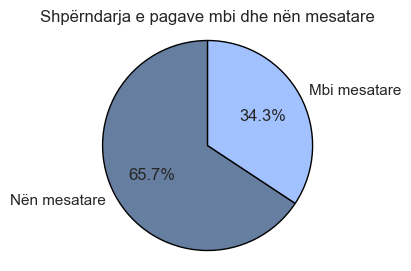

In [110]:
page_ulet = len(df[df['P_Bruto'] <= MESATARJA])
page_lart = len(df[df['P_Bruto'] > MESATARJA])

labels = ['Nën mesatare', 'Mbi mesatare']
colors = ['#667EA0', '#A2C2FF']

fig, ax = plt.subplots(figsize=(4, 3))
ax.pie(
    [page_ulet, page_lart],
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,        
    colors=colors,        
    wedgeprops={'edgecolor': 'black'}
)

ax.axis('equal')  
plt.title('Shpërndarja e pagave mbi dhe nën mesatare')
plt.show()


### 1.2    Tabela e 20 profesioneve me më shumë punonjës

In [111]:
profesioni = df.groupby('Profesioni').agg(
                Totali= ('Profesioni', 'count'),
                Mesatarja= ("P_Bruto", 'mean')
            ).sort_values(by='Totali', ascending=False)
profesioni['Mesatarja'] = profesioni['Mesatarja'].round(2)
profesioni.head(20)

,Totali,Mesatarja
Profesioni,,
Shitës në dyqan,43300,31611.79
Punëtor krahu,14322,29616.97
Administrator,13554,64012.64
Kamarier,12591,27406.64
Ekonomist,11553,53768.81
Shofer,11368,38537.32
Banakier,10352,29093.73
Operator telefoni në call centre,10093,57683.01
Sanitar,9218,36654.84


### Grafiku 1.2 
Grafiku me shtylla për pagat mesatare të 20 profesioneve me më shumë punonjës

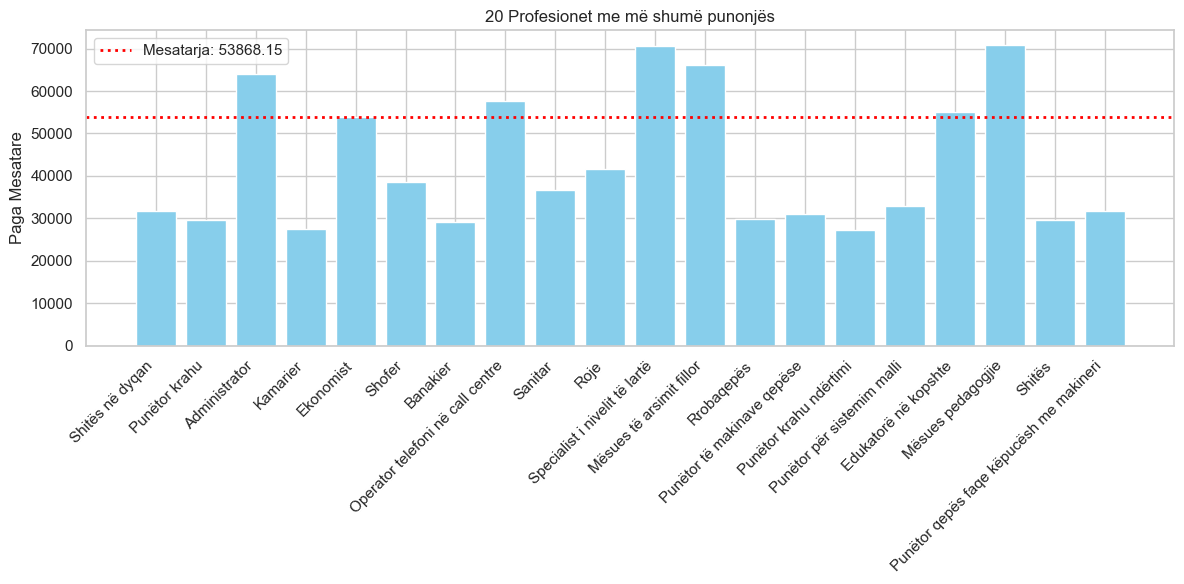

In [112]:
plt.figure(figsize=(12,6))
plt.bar(profesioni.index[:20], profesioni['Mesatarja'][:20], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Paga Mesatare')
plt.title('20 Profesionet me më shumë punonjës')

plt.axhline(y=MESATARJA, color='red', linestyle=':', linewidth=2, label=f'Mesatarja: {MESATARJA.round(2)}')

plt.legend()
plt.tight_layout()
plt.show()



### Pjesa 2: Pagat sipas DRT

Të analizojmë shpërndarjen e pagave bruto sipas Drejtorive Rajonale të Tatimeve (DRT) dhe të vlerësojmë nëse mesatarja është një tregues i besueshëm për secilin rajon.

### 2.1    Grupimi i të dhënave sipas DRT.

In [113]:
drejtorit = df.groupby('DRT').agg(
    Numri_punetoreve = ('P_Bruto', "count"),
    Mesatarja = ("P_Bruto", "mean"),
    Devijimi_standart = ("P_Bruto", 'std')
).reset_index()

drejtorit['Mesatarja'] = drejtorit['Mesatarja'].round(2)
drejtorit['Devijimi_standart'] = drejtorit['Devijimi_standart'].round(2)
drejtorit['Cv'] = (drejtorit['Devijimi_standart'] / drejtorit['Mesatarja']).round(2)

drejtorit

,DRT,Numri_punetoreve,Mesatarja,Devijimi_standart,Cv
0,Berat,13905,46177.40,29041.93,0.63
1,DTM,123444,72272.84,235902.45,3.26
2,Dibër,11349,50799.23,27961.01,0.55
3,Durrës,57563,42793.83,29932.84,0.70
4,Elbasan,25943,47912.80,49343.80,1.03
5,Fier,32002,44250.21,43382.09,0.98
6,Gjirokastër,10866,47046.45,47286.64,1.01
7,Korçë,21409,45189.63,28670.36,0.63
8,Kukës,7837,51175.58,28461.96,0.56
9,Lezhë,14537,45324.79,58748.74,1.30


### Grafiku 2.1

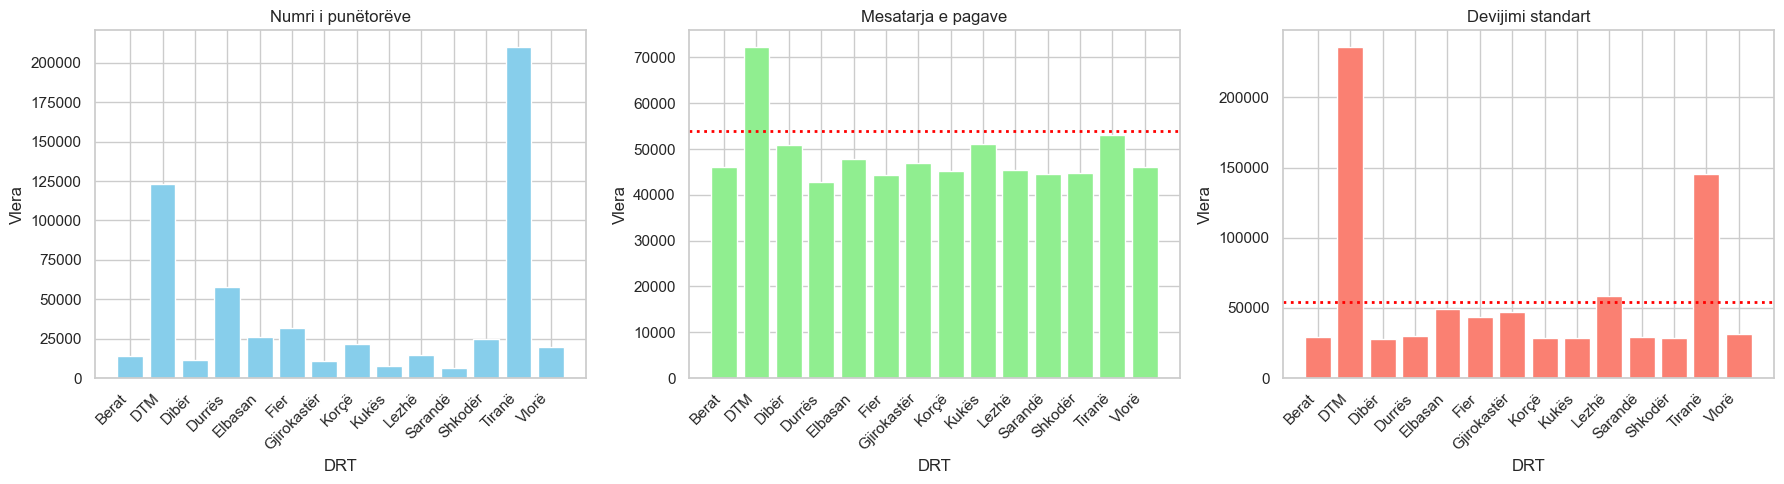

In [114]:
labels = drejtorit['DRT']
numri = drejtorit['Numri_punetoreve']
mesatarja = drejtorit['Mesatarja']
std = drejtorit['Devijimi_standart']

x = range(len(labels))

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Grafik 1: Numri i punëtorëve
axs[0].bar(x, numri, color='skyblue')
axs[0].set_title('Numri i punëtorëve')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels, rotation=45, ha='right')

# Grafik 2: Mesatarja e pagave
axs[1].bar(x, mesatarja, color='lightgreen')
axs[1].set_title('Mesatarja e pagave')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels, rotation=45, ha='right')
axs[1].axhline(y=MESATARJA, color='red', linestyle=':', linewidth=2, label=f'Mesatarja: {MESATARJA.round(2)}')

# Grafik 3: Devijimi standart
axs[2].bar(x, std, color='salmon')
axs[2].set_title('Devijimi standart')
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels, rotation=45, ha='right')
axs[2].axhline(y=MESATARJA, color='red', linestyle=':', linewidth=2, label=f'Mesatarja: {MESATARJA.round(2)}')

for ax in axs:
    ax.set_xlabel('DRT')
    ax.set_ylabel('Vlera')

plt.tight_layout()
plt.show()

*SQARIM* 

DTM: Drejtoria e Tatimeve te Medha, bizneset e medha qe paguajne me shum taksa.

*Interpretimi i grafikeve* 

1. Numri i punëtorëve
    - Tirana dhe DTM (Drejtoria e Tatimeve të Mëdha) kanë numrin më të madh të punonjësve, gjë që pritet për shkak të përqendrimit të bizneseve të mëdha dhe institucioneve qendrore.
    - Shumica e DRT-ve të tjera kanë shumë më pak punonjës, që tregon një shpërndarje të pabarabartë të forcës punëtore mes rajoneve.
2. Mesatarja e pagave
    - Mesatarja e pagave është më e lartë tek DTM dhe Tirana, çka mund të lidhet me prani të lartë të kompanive të mëdha dhe sektorëve që paguajnë më shumë (banking, telekom, energji).
    - Rajonet e tjera kanë paga mesatare më të ulëta, me diferenca më të vogla mes tyre.
3. Devijimi standard
    - Devijimi standard është më i lartë tek DTM dhe Tirana, që do të thotë se ka një shpërndarje shumë të gjerë pagash (disa punonjës paguhen shumë më lart se të tjerët).
    - Rajonet e tjera kanë devijime standarde më të vogla, që sugjeron se pagat janë më të njëtrajtshme brenda atij rajoni.


2.2 **Ndërtojmë matricën e korrelacioneve, për të parë se sa është lidhja mes treguesve.** 

Grafiku 2.2

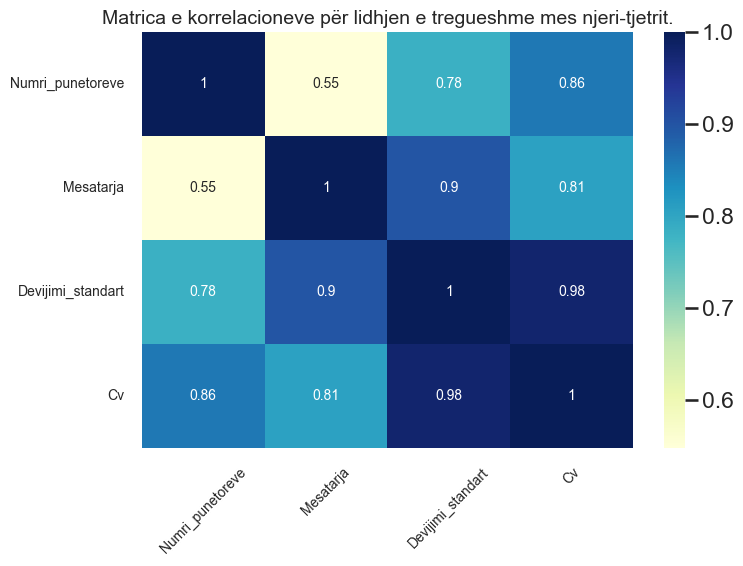

In [115]:
drejtoria = drejtorit[['Numri_punetoreve', 'Mesatarja', 'Devijimi_standart', 'Cv']]

corr = drejtoria.corr(numeric_only=True)

sns.set_style('dark')
sns.set_context('talk')
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", annot_kws={"size":10})
plt.title("Matrica e korrelacioneve për lidhjen e tregueshme mes njeri-tjetrit.", fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

*Interpretimi i matricës* 

Ka një lidhje të fortë mes variablave të shpërndarjes së pagave (devijimi standard dhe CV), ndërsa lidhja mes numrit të punëtorëve dhe pagave është më e dobët, çka sugjeron se madhësia e forcës punëtore nuk ndikon aq shumë në nivelin e pagave sa faktorët të tjerë.

### Pjesa 3: Pagat dhe punonjësit sipas Llojit të Biznesit

### 3.1 Krijimi i tabeles 
Nxjerrja e treguesve te numrit te punonjesve,  te mesatares, te devijimi standart dhe Cv

In [116]:
biznesi = df.groupby('Lloji biznesit').agg(
    Numri_punetoreve = ('P_Bruto', "count"),
    Mesatarja = ("P_Bruto", "mean"),
    Devijimi_standart = ("P_Bruto", 'std')
).reset_index()

biznesi['Mesatarja'] = biznesi['Mesatarja'].round(2)
biznesi['Devijimi_standart'] = biznesi['Devijimi_standart'].round(2)
biznesi['Cv'] = (biznesi['Devijimi_standart'] / biznesi['Mesatarja']).round(2)

biznesi

,Lloji biznesit,Numri_punetoreve,Mesatarja,Devijimi_standart,Cv
0,BM,366014,51485.46,142008.85,2.76
1,BV ME TVSH,15517,31266.33,20027.67,0.64
2,BV PA TVSH,46510,29064.14,12239.15,0.42
3,TJERA,151245,69580.71,167675.10,2.41


**3.2     Grafiku rrethor për numrin e punonjësve**

Grafiku 3.1

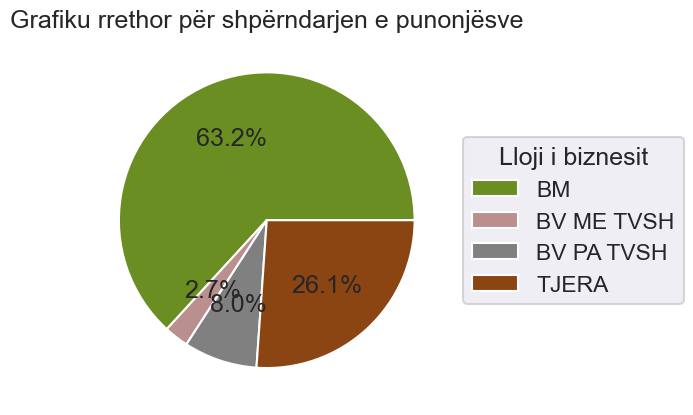

In [117]:
fig, ax = plt.subplots()

colors = ['olivedrab', 'rosybrown', 'gray', 'saddlebrown']
labels = biznesi['Lloji biznesit']

wedges, texts, autotexts = ax.pie(
    biznesi['Numri_punetoreve'], 
    labels=None,  
    autopct='%1.1f%%',
    colors=colors
)

ax.legend(
    wedges,  
    labels,
    title="Lloji i biznesit",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)  
)

plt.title('Grafiku rrethor për shpërndarjen e punonjësve')
plt.show()


**3.3     Krahasimin e mesatares dhe devijimit standard**

Grafiku 3.2

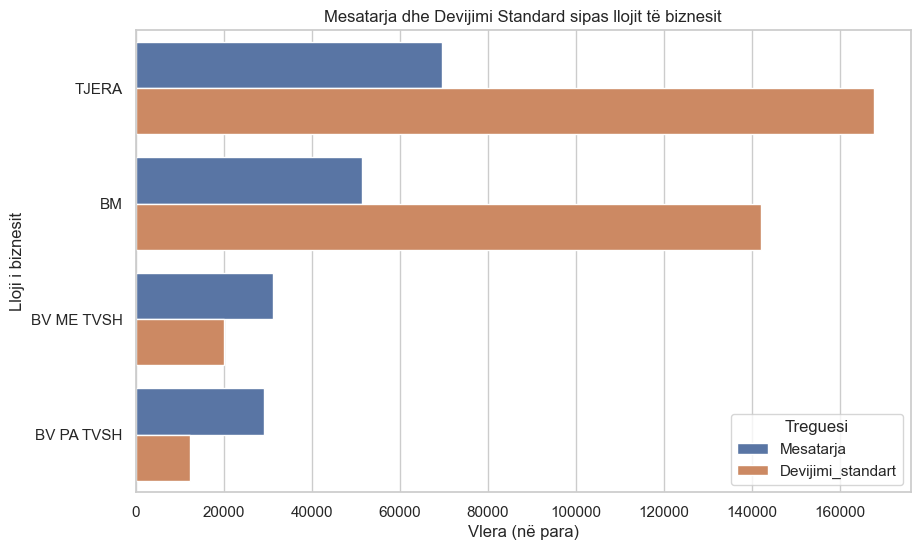

In [118]:
sns.set_theme(style="whitegrid")

biznesi_long = biznesi.melt(
    id_vars="Lloji biznesit",
    value_vars=["Mesatarja", "Devijimi_standart"],
    var_name="Treguesi",
    value_name="Vlera"
)

order = biznesi.sort_values("Mesatarja", ascending=False)["Lloji biznesit"]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=biznesi_long,
    x="Vlera",
    y="Lloji biznesit",
    hue="Treguesi",
    order=order
)

plt.xlabel("Vlera (në para)")
plt.ylabel("Lloji i biznesit")
plt.title("Mesatarja dhe Devijimi Standard sipas llojit të biznesit")
plt.legend(title="Treguesi")
plt.show()


*Interpretim* 

Punonjësit që punojnë në Biznese të Mëdha kanë një shpërndarje më të gjerë të pagave, gjë që krijon këtë nivel të lartë të devijimit standard.

Kjo shpërndarje e gjerë rritet me rritjen e numrit të punonjësve. Mbi 60% të punonjësve janë të punësuar në Biznese të Mëdha (BM), dhe niveli i devijimit standard është disa herë më i lartë se mesatarja.

Bizneset e vogla kanë një pagë mesatare më të ulët se BM, por shpërndarja e pagave nuk është e gjerë, dhe kjo bën që devijimi standard të jetë më i ulët se mesatarja, pjesërisht për shkak të numrit të ulët të të punësuarve në këto biznese.

**Përfundim**

1. Paga mesatare nuk është tregues i besueshëm për pagat në vend, pasi ekziston një shpërndarje e gjerë e pagave, që rrit artificialisht mesataren.

2. Rreth 65% e të punësuarve kanë një pagë nën mesatare, duke treguar se median është treguesi më i saktë për pagat bruto në vend.

3. Profesionet në administratë dhe pozicionet drejtuese janë ato që ofrojnë paga mbi mesataren.

4. Tirana dhe DTM (drejtoritë e mëdha tatimore) kanë numrin më të lartë të punonjësve, si dhe shpërndarjen më të gjerë të pagave, gjë që rrit artificialisht mesataren.

5. Lidhja mes devijimit standard dhe koeficientit të variancës është e fortë, ndërsa lidhja mes mesatares së pagave dhe numrit të punonjësve është e dobët.

6. Mbi 60% e të punësuarve punojnë në biznese të mëdha, ku paga mesatare është afërsisht e njëjtë me mesataren e vendit, por shpërndarja e pagave nuk është e barabartë, gjë që rrit devijimin standard.

*Fundi i studimi* 